Nama : Salasatun Nurul Aini STUDENT ID : 1101220038

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
ry_transaction = pd.read_csv(r"C:\Users\Salasatun Nurul Aini\OneDrive\ドキュメント\SEMESTER 6\AI dan BIG DATA\Case_Study_Transaction.csv", sep = ';')
ry_customer = pd.read_csv(r"C:\Users\Salasatun Nurul Aini\OneDrive\ドキュメント\SEMESTER 6\AI dan BIG DATA\Case_Study_Customer.csv", sep = ';')
ry_store = pd.read_csv(r"C:\Users\Salasatun Nurul Aini\OneDrive\ドキュメント\SEMESTER 6\AI dan BIG DATA\Case_Study_Store.csv", sep = ';')
ry_product = pd.read_csv(r"C:\Users\Salasatun Nurul Aini\OneDrive\ドキュメント\SEMESTER 6\AI dan BIG DATA\Case_Study_Product.csv", sep = ';')

In [6]:
ry_customer['Income'] = ry_customer['Income'].replace('[,]','.',regex=True)

In [7]:
ry_store['Latitude'] = ry_store['Latitude'].replace('[,]','.',regex=True)

In [8]:
ry_store['Longitude'] = ry_store['Longitude'].replace('[,]','.',regex=True)

In [9]:
ry_transaction['Date'] = pd.to_datetime(ry_transaction['Date'],format='mixed')

In [10]:
ry_merge = pd.merge(ry_transaction, ry_customer, on=['CustomerID'])
ry_merge = pd.merge(ry_merge, ry_product.drop(columns=['Price']), on=['ProductID'])
ry_merge = pd.merge(ry_merge, ry_store, on=['StoreID'])

In [11]:
ry_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR16356,165,2022-01-01,P9,10000,7,70000,1,44,1,Married,14.58,Yoghurt,Prima Tendean,Prima,Modern Trade,-6.2,106.816666
2,TR1984,183,2022-01-01,P1,8800,4,35200,4,27,1,Single,0.18,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR35256,160,2022-01-01,P1,8800,7,61600,4,48,1,Married,12.57,Choco Bar,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR41231,386,2022-01-01,P9,10000,1,10000,4,33,0,Married,6.95,Yoghurt,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [12]:
ry_regresi = ry_merge.groupby(['Date']).agg({    
    'Qty' : 'sum'
}).reset_index()

In [13]:
ry_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


In [14]:
#Split Data 
split_index = int(len(ry_regresi) * 0.8) 
ry_train = ry_regresi.iloc[:split_index].copy() 
ry_test = ry_regresi.iloc[split_index:].copy()

In [15]:
def eval(y_true, y_pred):    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)    
    print(f"MAE: {mae}, MSE: {mse}")

In [16]:
print(ry_train.columns)
print(ry_train.head())

Index(['Date', 'Qty'], dtype='object')
        Date  Qty
0 2022-01-01   49
1 2022-01-02   50
2 2022-01-03   76
3 2022-01-04   98
4 2022-01-05   67


C:\Users\Salasatun Nurul Aini\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Salasatun Nurul Aini\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Salasatun Nurul Aini\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 12.357065413571616, MSE: 239.3948128322159


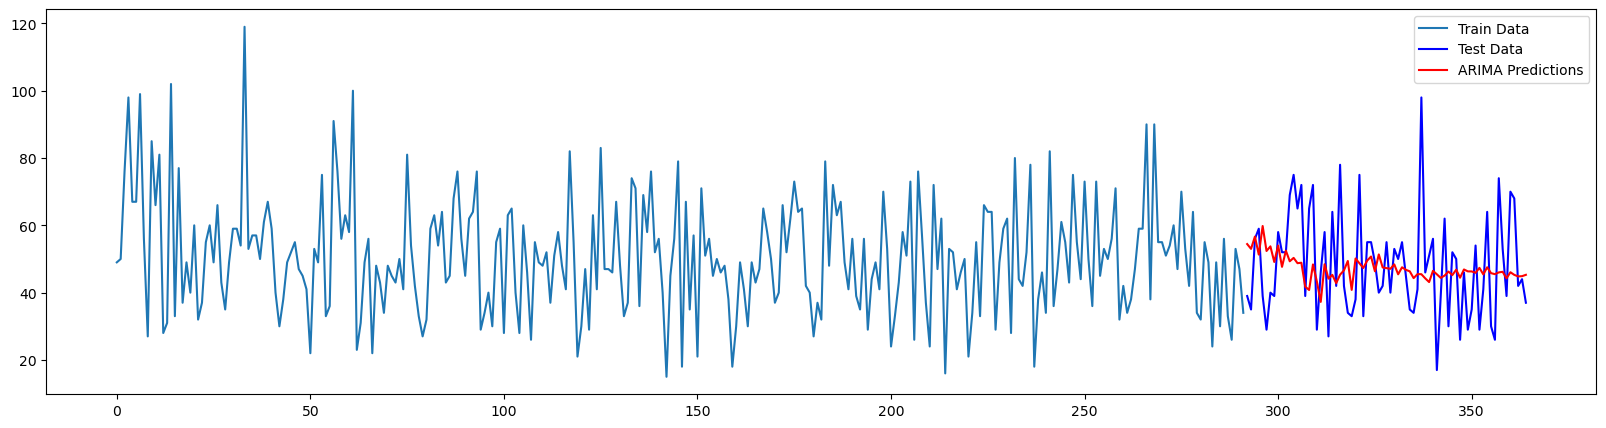

In [17]:
# Ambil kolom 'Qty' dari data training
y_train = ry_train['Qty']

# Buat prediksi sebanyak panjang data test
forecast = model.get_forecast(steps=len(ry_test))
conf_int = forecast.conf_int()

# Tambahkan prediksi ke dataframe confidence interval
conf_int['predictions'] = model.predict(start=conf_int.index[0], end=conf_int.index[-1])

# Samakan index hasil prediksi dengan index test
conf_int.index = ry_test.index

# Ambil hasil prediksi
y_pred = conf_int['predictions']

# Evaluasi model
eval(ry_test['Qty'], y_pred)

# Plot hasil prediksi vs data asli
plt.figure(figsize=(20, 5))
plt.plot(ry_train['Qty'], label='Train Data')
plt.plot(ry_test['Qty'], label='Test Data', color='blue')
plt.plot(y_pred, label='ARIMA Predictions', color='red')
plt.legend()
plt.show()